# Movie Recommendations HW

**Name:**  

**Collaboration Policy:** Homeworks will be done individually: each student must hand in their own answers. Use of partial or entire solutions obtained from others or online is strictly prohibited.

**Late Policy:** Late submission have a penalty of 2\% for each passing hour. 

**Submission format:** Successfully complete the Movie Lens recommender as described in this jupyter notebook. Submit a `.py` and an `.ipynb` file for this notebook. You can go to `File -> Download as ->` to download a .py version of the notebook. 

**Only submit one `.ipynb` file and one `.py` file.** The `.ipynb` file should have answers to all the questions. Do *not* zip any files for submission. 

**Download the dataset from here:** https://grouplens.org/datasets/movielens/1m/

In [1]:
# Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


## Reading the Data
Now that we have downloaded the files from the link above and placed them in the same directory as this Jupyter Notebook, we can load each of the tables of data as a CSV into Pandas. Execute the following, provided code.

In [2]:
# Read the dataset from the two files into ratings_data and movies_data
#NOTE: if you are getting a decode error, add "encoding='ISO-8859-1'" as an additional argument
#      to the read_csv function
column_list_ratings = ["UserID", "MovieID", "Ratings","Timestamp"]
ratings_data  = pd.read_csv('ratings.dat',sep='::',names = column_list_ratings, engine='python')
column_list_movies = ["MovieID","Title","Genres"]
movies_data = pd.read_csv('movies.dat',sep = '::',names = column_list_movies, engine='python', encoding = 'latin-1')
column_list_users = ["UserID","Gender","Age","Occupation","Zixp-code"]
user_data = pd.read_csv("users.dat",sep = "::",names = column_list_users, engine='python')

`ratings_data`, `movies_data`, `user_data` corresponds to the data loaded from `ratings.dat`, `movies.dat`, and `users.dat` in Pandas.

## Data analysis

We now have all our data in Pandas - however, it's as three separate datasets! To make some more sense out of the data we have, we can use the Pandas `merge` function to combine our component data-frames. Run the following code:

In [3]:
data=pd.merge(pd.merge(ratings_data,user_data),movies_data)
data

,UserID,MovieID,Ratings,Timestamp,Gender,Age,Occupation,Zixp-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


Next, we can create a pivot table to match the ratings with a given movie title. Using `data.pivot_table`, we can aggregate (using the average/`mean` function) the reviews and find the average rating for each movie. We can save this pivot table into the `mean_ratings` variable. 

In [4]:
mean_ratings=data.pivot_table('Ratings','Title',aggfunc='mean')
mean_ratings

,Ratings
Title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568
...,...
"Zed & Two Noughts, A (1985)",3.413793
Zero Effect (1998),3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000


Now, we can take the `mean_ratings` and sort it by the value of the rating itself. Using this and the `head` function, we can display the top 15 movies by average rating.

In [5]:
mean_ratings=data.pivot_table('Ratings',index=["Title"],aggfunc='mean')
top_15_mean_ratings = mean_ratings.sort_values(by = 'Ratings',ascending = False).head(15)
top_15_mean_ratings

,Ratings
Title,
Ulysses (Ulisse) (1954),5.000000
Lured (1947),5.000000
Follow the Bitch (1998),5.000000
Bittersweet Motel (2000),5.000000
Song of Freedom (1936),5.000000
One Little Indian (1973),5.000000
Smashing Time (1967),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000


Let's adjust our original `mean_ratings` function to account for the differences in gender between reviews. This will be similar to the same code as before, except now we will provide an additional `columns` parameter which will separate the average ratings for men and women, respectively.

In [6]:
mean_ratings=data.pivot_table('Ratings',index=["Title"],columns=["Gender"],aggfunc='mean')
mean_ratings

Gender,F,M
Title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


We can now sort the ratings as before, but instead of by `Rating`, but by the `F` and `M` gendered rating columns. Print the top rated movies by male and female reviews, respectively.

In [7]:
data=pd.merge(pd.merge(ratings_data,user_data),movies_data)

mean_ratings=data.pivot_table('Ratings',index=["Title"],columns=["Gender"],aggfunc='mean')
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
print(top_female_ratings.head(15))

top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)
print(top_male_ratings.head(15))

Gender                                               F         M
Title                                                           
Clean Slate (Coup de Torchon) (1981)               5.0  3.857143
Ballad of Narayama, The (Narayama Bushiko) (1958)  5.0  3.428571
Raw Deal (1948)                                    5.0  3.307692
Bittersweet Motel (2000)                           5.0       NaN
Skipped Parts (2000)                               5.0  4.000000
Lamerica (1994)                                    5.0  4.666667
Gambler, The (A Játékos) (1997)                    5.0  3.166667
Brother, Can You Spare a Dime? (1975)              5.0  3.642857
Ayn Rand: A Sense of Life (1997)                   5.0  4.000000
24 7: Twenty Four Seven (1997)                     5.0  3.750000
Twice Upon a Yesterday (1998)                      5.0  3.222222
Woman of Paris, A (1923)                           5.0  2.428571
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                5.0  4.750000
Gate of Heavenly Peace, T

In [8]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

Gender,F,M,diff
Title,,,
"James Dean Story, The (1957)",4.000000,1.000000,-3.000000
Country Life (1994),5.000000,2.000000,-3.000000
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",4.000000,1.000000,-3.000000
Babyfever (1994),3.666667,1.000000,-2.666667
"Woman of Paris, A (1923)",5.000000,2.428571,-2.571429
Cobra (1925),4.000000,1.500000,-2.500000
"Other Side of Sunday, The (Søndagsengler) (1996)",5.000000,2.928571,-2.071429
"To Have, or Not (1995)",4.000000,2.000000,-2.000000
For the Moment (1994),5.000000,3.000000,-2.000000


Let's try grouping the data-frame, instead, to see how different titles compare in terms of the number of ratings. Group by `Title` and then take the top 10 items by number of reviews. We can see here the most popularly-reviewed titles.

In [9]:
ratings_by_title=data.groupby('Title').size()
ratings_by_title.sort_values(ascending=False).head(10)

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
dtype: int64

Similarly, we can filter our grouped data-frame to get all titles with a certain number of reviews. Filter the dataset to get all movie titles such that the number of reviews is >= 2500.

## Question 1

Create a ratings matrix using Numpy. This matrix allows us to see the ratings for a given movie and user ID. The element at location $[i,j]$ is a rating given by user $i$ for movie $j$. Print the **shape** of the matrix produced.  

Additionally, choose 3 users that have rated the movie with MovieID "**1377**" (Batman Returns). Print these ratings, they will be used later for comparison.


**Notes:**
- Do *not* use `pivot_table`.
- A ratings matrix is *not* the same as `ratings_data` from above.
- The ratings of movie with MovieID $i$ are stored in the ($i$-1)th column (index starts from 0)  
- Not every user has rated every movie. Missing entries should be set to 0 for now.
- If you're stuck, you might want to look into `np.zeros` and how to use it to create a matrix of the desired shape.
- Every review lies between 1 and 5, and thus fits within a `uint8` datatype, which you can specify to numpy.

In [10]:
value_counts = np.zeros(data.UserID.max())
user_counts = np.zeros(data.UserID.max())
for i in range(data.UserID.max()):
    value_counts[i] = data['UserID'].value_counts()[i+1]
    user_counts[i] = i


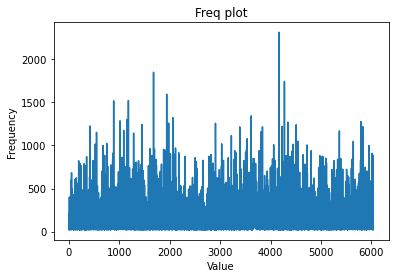

In [11]:
plt.plot(user_counts, value_counts)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Freq plot')
plt.show()

In [12]:
print(min(data.MovieID))
print(min((value_counts)))
print

1
20.0


<function print>

In [13]:
data.UserID.max()

6040

In [14]:


# Assuming you have a DataFrame called 'df' with a column named 'column_name'
null_count = data['UserID'].isnull().sum()

print("Total number of null values in 'column_name':", null_count)

Total number of null values in 'column_name': 0


In [15]:
print(data['UserID'][0])

1


In [16]:
# Create the matrix
matrix = np.zeros((data['UserID'].max(), data['MovieID'].max()))
matrix = matrix.astype(np.uint8)
for i, row in data.iterrows():
    matrix[row['UserID']-1, row['MovieID']-1] = row['Ratings']

In [17]:
print(np.count_nonzero(matrix))
print(data['Ratings'].count())

1000209
1000209


In [18]:
print(matrix)

[[5 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]]


In [19]:
matrix[0]

array([5, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [20]:
# Print the shape
print(matrix.shape)

(6040, 3952)


In [21]:
# Store and print ratings for Batman Returns
# for movie id = 1377 we need to check column 1376
batman_rating = np.empty(0,)
flag = 0
for i in range(matrix.shape[0]):
    if matrix[i,1376] != 0:
        print(f"The user {i+1} has rated the batman movie - {matrix[i,1376]}")
        batman_rating = np.append(batman_rating, matrix[1376,i])
        flag +=1
        if flag >= 3:
            break
batman_rating = batman_rating.astype(np.uint8)
print(batman_rating)

The user 10 has rated the batman movie - 3
The user 13 has rated the batman movie - 3
The user 18 has rated the batman movie - 2
[4 0 0]


## Question 2

Normalize the ratings matrix (created in **Question 1**) using Z-score normalization. While we can't use `sklearn`'s `StandardScaler` for this step, we can do the statistical calculations ourselves to normalize the data.

Before you start:
- Your first step should be to get the average of every *column* of the ratings matrix (we want an average by title, not by user!).
- Make sure that the mean is calculated considering only non-zero elements. If there is a movie which is rated only by 10 users, we get its mean rating using (sum of the 10 ratings)/10 and **NOT** (sum of 10 ratings)/(total number of users)
- All of the missing values in the dataset should be replaced with the average rating for the given movie. This is a complex topic, but for our case replacing empty values with the mean will make it so that the absence of a rating doesn't affect the overall average, and it provides an "expected value" which is useful for computing correlations and recommendations in later steps.
- In our matrix, 0 represents a missing rating.
- Next, we want to subtract the average from the original ratings thus allowing us to get a mean of 0 in every *column*. It may be very close but not exactly zero because of the limited precision `float`s allow.
- Lastly, divide this by the standard deviation of the *column*.

- Not every MovieID is used, leading to zero columns. This will cause a divide by zero error when normalizing the matrix. Simply replace any NaN values in your normalized matrix with 0.

In [22]:
# finding average rating for each column
avg_by_col = np.zeros(matrix.shape[1])
for i in range(len(avg_by_col)) :
    avg_by_col[i] = np.sum(matrix[:,i]) / np.count_nonzero(matrix[:,i])
print(avg_by_col)

<ipython-input-22-96565ba837b8>:4: RuntimeWarning: invalid value encountered in true_divide
  avg_by_col[i] = np.sum(matrix[:,i]) / np.count_nonzero(matrix[:,i])


[4.14684641 3.20114123 3.0167364  ... 3.66666667 3.9        3.78092784]


In [23]:
# imputing average values to a matrix copy ie imp matrix 
imp_matrix = matrix.copy()
imp_matrix = imp_matrix.astype(float)
for i in range(imp_matrix.shape[1]):
    for j in range(imp_matrix.shape[0]):
        if imp_matrix[j,i] == 0:
            imp_matrix[j,i] = avg_by_col[i]   

In [24]:
# subtracting average values
for i in range(imp_matrix.shape[1]):
    for j in range(imp_matrix.shape[0]):
        imp_matrix[j][i] = imp_matrix[j][i] - avg_by_col[i]
 

In [25]:
# dividing by the standard deviation
std_dev = np.zeros(imp_matrix.shape[1])
for i in range(imp_matrix.shape[1]):
    std_dev[i] = np.std(imp_matrix[:,i])
    for j in range(imp_matrix.shape[0]):
        imp_matrix[j][i] = imp_matrix[j][i] / std_dev[i]

<ipython-input-25-601b0cd7ae90>:6: RuntimeWarning: invalid value encountered in double_scalars
  imp_matrix[j][i] = imp_matrix[j][i] / std_dev[i]


In [26]:
# replacing nan with 0
imp_matrix = np.nan_to_num(imp_matrix)
std_dev = np.nan_to_num(std_dev)
print(np.sum(np.isnan(imp_matrix)))

0


In [27]:
imp_matrix

array([[ 1.70731838,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-2.29505214,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

## Question 3

We're now going to perform Singular Value Decomposition (SVD) on the normalized ratings matrix from the previous question. Perform the process using numpy, and along the way print the shapes of the $U$, $S$, and $V$ matrices you calculated.

In [28]:
# Compute the SVD of the normalised matrix
U, S, V = np.linalg.svd(imp_matrix)

In [29]:
# Print the shapes
print(U.shape, S.shape, V.shape)

(6040, 6040) (3952,) (3952, 3952)


In [30]:
S

array([6.86730288e+02, 4.98035613e+02, 4.33011861e+02, ...,
       1.79731943e-14, 1.63833508e-14, 6.97864963e-15])

## Question 4

Reconstruct four rank-k rating matrix $R_k$, where $R_k = U_kS_kV_k^T$ for k = [100, 1000, 2000, 3000]. Using each of $R_k$ make predictions for the 3 users selected in Question 1, for the movie with ID 1377 (Batman Returns). Compare the original ratings with the predicted ratings.

In [31]:
def denormalise(M,avg_val,std_dev):
    for i in range(M.shape[1]):
        for j in range(M.shape[0]):
            M[j][i] = M[j][i] * std_dev[i] + avg_val[i]
    return M

In [32]:
# Reconstructing with values of k
# k = 100
Rk100 = U[:, :100]@np.diag(S[:100])@V[:100]
Rk1000 = U[:, :1000]@np.diag(S[:1000])@V[:1000]
Rk2000 = U[:, :2000]@np.diag(S[:2000])@V[:2000]
Rk3000 = U[:, :3000]@np.diag(S[:3000])@V[:3000]

print(f"Actual rating by user 10 is {imp_matrix[9,1376]}")
print(f"The predicted value for user 10 for Rk100, Rk1000, Rk2000, Rk3000 are respectively: {Rk100[9, 1376], Rk1000[9, 1376], Rk2000[9, 1376], Rk3000[9, 1376]}")

Actual rating by user 10 is 0.058224813322698646
The predicted value for user 10 for Rk100, Rk1000, Rk2000, Rk3000 are respectively: (1.2927237774894476, 0.04396383685247704, 0.3763548778954517, 0.08743557396575811)


In [33]:
#denormalising the matrix
recon_Rk100 = denormalise(Rk100.copy(),avg_by_col,std_dev)
recon_Rk1000 = denormalise(Rk1000.copy(),avg_by_col,std_dev)
recon_Rk2000 = denormalise(Rk2000.copy(),avg_by_col,std_dev)
recon_Rk3000 = denormalise(Rk3000.copy(),avg_by_col,std_dev)
recon_Rk100 = np.nan_to_num(recon_Rk100)
recon_Rk1000 = np.nan_to_num(recon_Rk1000)
recon_Rk2000 = np.nan_to_num(recon_Rk2000)
recon_Rk3000 = np.nan_to_num(recon_Rk3000)

In [34]:
print(f"Actual rating by user 10 is {matrix[9,1376]}")
print(f"The predicted value for user 10 for Rk100, Rk1000, Rk2000, Rk3000 are respectively: {recon_Rk100[9, 1376], recon_Rk1000[9, 1376], recon_Rk2000[9, 1376], recon_Rk3000[9, 1376]}")

Actual rating by user 10 is 3
The predicted value for user 10 for Rk100, Rk1000, Rk2000, Rk3000 are respectively: (3.49355459720983, 2.9942984395273835, 3.1271888923669713, 3.0116785073311982)


In [35]:
print(f"Actual rating by user 13 is {matrix[12,1376]}")
print(f"The predicted value for user 13 for Rk100, Rk1000, Rk2000, Rk3000 are respectively: {recon_Rk100[12, 1376], recon_Rk1000[12, 1376], recon_Rk2000[12, 1376], recon_Rk3000[12, 1376]}")

Actual rating by user 13 is 3
The predicted value for user 13 for Rk100, Rk1000, Rk2000, Rk3000 are respectively: (2.921966888888218, 3.047602947285388, 3.1029750733227717, 3.0286106456323867)


In [36]:
print(f"Actual rating by user 18 is {matrix[17,1376]}")
print(f"The predicted value for user 18 for Rk100, Rk1000, Rk2000, Rk3000 are respectively: {recon_Rk100[17, 1376], recon_Rk1000[17, 1376], recon_Rk2000[17, 1376], recon_Rk3000[17, 1376]}")

Actual rating by user 18 is 2
The predicted value for user 18 for Rk100, Rk1000, Rk2000, Rk3000 are respectively: (3.022978478628901, 2.4832508815975105, 1.9757659577858344, 1.9859280562288486)


## Question 5

### Cosine Similarity
Cosine similarity is a metric used to measure how similar two vectors are. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. Cosine similarity is high if the angle between two vectors is 0, and the output value ranges within $cosine(x,y) \in [0,1]$. $0$ means there is no similarity (perpendicular), where $1$ (parallel) means that both the items are 100% similar.

$$ cosine(x,y) = \frac{x^T y}{||x|| ||y||}  $$

**Based on the reconstruction rank-1000 rating matrix $R_{1000}$ and the cosine similarity,** sort the movies which are most similar. You will have a function `top_movie_similarity` which sorts data by its similarity to a movie with ID `movie_id` and returns the top $n$ items, and a second function `print_similar_movies` which prints the titles of said similar movies. Return the top 5 movies for the movie with ID `1377` (*Batman Returns*)

Note: While finding the cosine similarity, there are a few empty columns which will have a magnitude of **zero** resulting in NaN values. These should be replaced by 0, otherwise these columns will show most similarity with the given movie. 

In [37]:
# Sort the movies based on cosine similarity
def top_movie_similarity(data_M, movie_id, top_n=5):
    # Movie id starts from 1
    # Use the calculation formula above
    dot_prod = np.zeros(data_M.shape[1])
    movie_titles = np.empty(top_n, dtype=object)
    for i in range(data_M.shape[1]):
        if(np.linalg.norm(data_M[:, movie_id - 1]) * np.linalg.norm(data_M[:, i]) == 0):
            dot_prod[i] = 0
        else:
            dot_prod[i] = np.dot(data_M[:, movie_id - 1], data_M[:, i]) / (np.linalg.norm(data_M[:, movie_id - 1]) * np.linalg.norm(data_M[:, i])
        )
    
    top_indices = np.argsort(-dot_prod)[1 : top_n+1]
    top_indices = np.nan_to_num(top_indices)
    return top_indices

def print_similar_movies(movie_data, top_indices):
    print("Most Similar movies: ")
    for i in top_indices:
        print(data[data['MovieID'] == (i+1)]['Title'].values[0])

# Print the top 5 movies for Batman Returns
movie_id = 1377
top_indices = top_movie_similarity(Rk1000, movie_id)
print_similar_movies(data, top_indices)


Most Similar movies: 
Batman Forever (1995)
Batman (1989)
Dick Tracy (1990)
Batman & Robin (1997)
Back to the Future Part II (1989)


## Question 6

### Movie Recommendations
Using the same process from Question 5, write `top_user_similarity` which sorts data by its similarity to a user with ID `user_id` and returns the top result. Then find the MovieIDs of the movies that this similar user has rated most highly, but that `user_id` has not yet seen. Find at least 5 movie recommendations for the user with ID `5954` and print their titles.

Hint: To check your results, find the genres of the movies that the user likes and compare with the genres of the recommended movies.

In [38]:
import numpy as np


def top_user_similarity(user_id, data, k=1):
    dot_prod = np.dot(data, data[user_id - 1])
    user_norm = np.linalg.norm(data[user_id - 1])
    norms = np.linalg.norm(data, axis=1)
    similarities = dot_prod / (user_norm * norms)
    top_indices_us = np.argsort(-similarities)[1:k+1]
    return top_indices_us

def top_unseen_movies(data, user_id, top_n):
    similar_user_ids = top_user_similarity(user_id, Rk1000, k=1)
    
    unseen_movies = np.where(Rk1000[user_id - 1, :] == 0)[0]
    
    similar_user_ratings = Rk1000[similar_user_ids[0], unseen_movies]
    
    sorted_movie_indices = np.argsort(similar_user_ratings)[::-1]
    
    top_unseen_movie_indices = sorted_movie_indices[:top_n]
    
    for movie_index in top_unseen_movie_indices:
        movie_id = unseen_movies[movie_index]
        movie_title = data[data['MovieID'] == movie_id]['Title'].values[0]
        print(movie_title)

top_unseen_movies(data, 5954, 5)


Under Suspicion (2000)
Trixie (1999)
On the Town (1949)
Gold Rush, The (1925)
Big Momma's House (2000)
